In [56]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sys
from matplotlib import font_manager, rc, cm                ## 폰트를 관리하는 함수와 설정 함수를 사용한다. 

font_path = './font/GmarketSansTTFMedium.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [57]:
# 평균 매매가격
data = pd.read_excel('./data/price/평균매매가격_아파트.xlsx', header=10)
data = data.drop(['Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3'], axis=1)
data = data.iloc[[0],:].drop('지 역', axis=1).T
sale_data = data.iloc[48:120].astype('int64')
sale_data.columns = ['매매가']
sale_data.reset_index(drop=False, inplace= True)
date_list = sale_data['index'].str.split(' ')

sale_data['연도'] = date_list.str.get(0)
sale_data['월'] = date_list.str.get(1)

grouped = sale_data.groupby('연도')
grouped_sale_data = grouped.mean()

In [58]:
# 평균 전세가격
data = pd.read_excel('./data/price/평균전세가격_아파트.xlsx', header=10)
data = data.drop(['Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3'], axis=1)
data = data.iloc[[0],:].drop('지 역', axis=1).T
lease_data = data.iloc[48:120].astype('int64')
lease_data.columns = ['전세가']
lease_data.reset_index(drop=False, inplace= True)
date_list = lease_data['index'].str.split(' ')

lease_data['연도'] = date_list.str.get(0)
lease_data['월'] = date_list.str.get(1)

grouped = lease_data.groupby('연도')
grouped_lease_data = grouped.mean()

In [59]:
data = pd.read_excel('./data/price/매매가격대비전세가격_평균가격_아파트.xlsx', header=10)
data = data.drop(['Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3'], axis=1)
data = data.iloc[[0],:].drop('지 역', axis=1).T
per_data = data.iloc[48:120].astype('int64')
per_data.columns = ['전세가율']
per_data.reset_index(drop=False, inplace= True)
date_list = per_data['index'].str.split(' ')

per_data['연도'] = date_list.str.get(0)
per_data['월'] = date_list.str.get(1)

grouped = per_data.groupby('연도')
grouped_per_data = grouped.mean()

In [60]:
data = pd.read_csv('./data/보증사고현황(2016-2021).csv', encoding = 'CP949')
data = data.set_index('연도')
accident_data = pd.DataFrame(data[data['보증종류'] == '전세보증금반환보증']['건수'])

In [61]:
df = pd.concat([accident_data, grouped_sale_data, grouped_lease_data, grouped_per_data], join='inner', axis=1)
df

,건수,매매가,전세가,전세가율
연도,,,,
2016년,27,281272.333333,203355.250000,73.750000
2017년,33,288256.833333,208642.500000,74.083333
2018년,372,321295.916667,224878.833333,73.666667
2019년,1630,346602.000000,224964.583333,71.000000
2020년,2408,379655.666667,238244.583333,70.083333
2021년,2799,459218.666667,286890.083333,69.166667


In [62]:
df.corr()

,건수,매매가,전세가,전세가율
건수,1.000000,0.940007,0.857649,-0.994874
매매가,0.940007,1.000000,0.981449,-0.929508
전세가,0.857649,0.981449,1.000000,-0.844418
전세가율,-0.994874,-0.929508,-0.844418,1.000000


C:\Users\Seungjun\anaconda3\envs\pydatavenv\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\Seungjun\anaconda3\envs\pydatavenv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


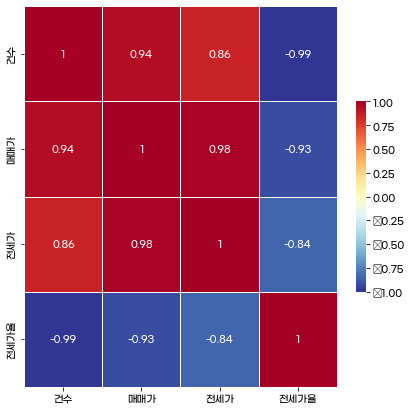

In [63]:
fig, ax = plt.subplots( figsize=(7,7) )

# 히트맵을 그린다
sns.heatmap(df.corr(), 
            cmap = 'RdYlBu_r',
            annot = True,
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()